# Análise de Vendas com Pandas

Este projeto tem como objetivo demonstrar, na prática, o uso da biblioteca Pandas
para limpeza, transformação e análise de dados de vendas.

Ao longo do notebook são abordados:
- Importação e inspeção de dados
- Tratamento de valores nulos
- Padronização de textos e datas
- Criação de novas métricas
- Análises exploratórias e agregações
- Merge entre bases
- Análise temporal de faturamento

# 📦 Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np

# 📂 Carregamento dos dados

In [2]:
df_vendas = pd.read_csv('Data/vendas_tech.csv', low_memory=False)
df_gerentes = pd.read_excel('Data/gerentes_lojas.xlsx')


# 🔍 Inspeção inicial dos dados

In [3]:
display(df_vendas.head())
display(df_vendas.sample(10))
display(df_vendas.info())
display(df_vendas.describe())

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Data_Base
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095,2025-01-01
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750,NaN
2,3,2023-02-25,NaN,"Monitor 27""",1200.0,1,Cliente_14859,NaN
3,4,2024-11-19,RIO DE JANEIRO,Mouse Gamer,120.0,2,Cliente_17343,NaN
4,5,2024-01-27,Rio de Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377,NaN


,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Data_Base
64354,64355,2024-10-29,Curitiba,Mouse Gamer,120.0,1,Cliente_11469,NaN
22770,22771,2024-10-04,Belo Horizonte,Cabo HDMI,40.0,1,Cliente_18359,NaN
58820,58821,2024-09-04,Recife,Cabo HDMI,40.0,2,Cliente_28899,NaN
6132,6133,2024-02-11,São Paulo,Notebook HP,3200.0,2,Cliente_2354,NaN
65729,65730,2023-12-31,Belo Horizonte,Notebook Dell,3500.0,1,Cliente_29719,NaN
51333,51334,2023-08-25,Curitiba,iPhone 14,5500.0,2,Cliente_18493,NaN
65737,65738,2024-10-24,Recife,Smartphone Samsung,2200.0,1,Cliente_28814,NaN
47683,47684,2024-05-10,São Paulo,iPhone 14,5500.0,1,Cliente_27623,NaN
32460,32461,2023-12-12,Curitiba,Notebook HP,3200.0,1,Cliente_13928,NaN
2852,2853,2023-09-17,São Paulo,Smartphone Samsung,2200.0,1,Cliente_19672,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID_Pedido       100100 non-null  int64  
 1   Data            100100 non-null  object 
 2   Loja            98099 non-null   object 
 3   Produto         100100 non-null  object 
 4   Preco_Unitario  100100 non-null  float64
 5   Qtd             100100 non-null  int64  
 6   Cliente         100100 non-null  object 
 7   Data_Base       1 non-null       object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.1+ MB


None

,ID_Pedido,Preco_Unitario,Qtd
count,100100.000000,100100.000000,100100.000000
mean,50004.810180,2000.204595,1.499101
std,28866.872543,1841.050733,1.241605
min,1.000000,40.000000,1.000000
25%,25008.750000,120.000000,1.000000
50%,50004.500000,1200.000000,1.000000
75%,75002.250000,3200.000000,1.000000
max,100000.000000,5500.000000,10.000000


In [4]:
display(df_gerentes.head())
display(df_gerentes.info())

,Loja,Gerente,Meta_Mensal
0,São Paulo,Carlos,50000
1,Rio de Janeiro,Fernanda,60000
2,Curitiba,Roberto,45000
3,Belo Horizonte,Juliana,1780100
4,Recife,Marcos,48000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loja         7 non-null      object
 1   Gerente      7 non-null      object
 2   Meta_Mensal  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


None

# 🧹 Seleção e limpeza inicial

In [5]:
# Removendo coluna que não será utilizada
df_analise = df_vendas.drop(columns=['Data_Base'])

# 🚫 Tratamento de valores nulos

In [6]:
# Preenchendo lojas nulas como Loja Online
df_analise['Loja'] = df_analise['Loja'].fillna('Loja Online')


In [7]:
df_analise.isna().sum()

ID_Pedido         0
Data              0
Loja              0
Produto           0
Preco_Unitario    0
Qtd               0
Cliente           0
dtype: int64

# 📅 Tratamento de datas

In [8]:
df_analise['Data'] = pd.to_datetime(df_analise['Data'], format='%Y-%m-%d')


# ✍️ Padronização de textos

In [9]:
df_analise['Loja'] = (
    df_analise['Loja']
    .str.strip()
    .str.title()
)

df_analise['Produto'] = (
    df_analise['Produto']
    .str.strip()
    .str.title()
)

df_analise['Cliente'] = (
    df_analise['Cliente']
    .str.strip()
    .str.capitalize()
)

df_gerentes['Loja'] = (
    df_gerentes['Loja']
    .str.strip()
    .str.title()
)


# 🧾 Remoção de duplicidades

In [10]:
df_analise = df_analise.drop_duplicates(subset='ID_Pedido')


# 🧠 Criação de novas métricas

### 💰 Faturamento

In [11]:
df_analise['Faturamento'] = df_analise['Preco_Unitario'] * df_analise['Qtd']


### 🛒 Forma de venda

In [12]:
df_analise['Forma_de_Venda'] = np.where(
    df_analise['Loja'] == 'Loja Online',
    'Online',
    'Presencial'
)


### 🌎 Região

In [13]:
mapa_regioes = {
    'São Paulo': 'Sudeste',
    'Belo Horizonte': 'Sudeste',
    'Rio De Janeiro': 'Sudeste',
    'Salvador': 'Nordeste',
    'Recife': 'Nordeste',
    'Curitiba': 'Sul',
    'Porto Alegre': 'Sul',
    'Loja Online': 'Online'
}

df_analise['Regiao'] = df_analise['Loja'].map(mapa_regioes)


# 🔎 Ordenação e organização

In [14]:
df_analise = (
    df_analise
    .sort_values(by=['Data', 'Faturamento'])
    .reset_index(drop=True)
)


# 📊 Análises Exploratórias

### 🏬 Faturamento por loja

In [15]:
faturamento_lojas = (
    df_analise
    .groupby('Loja', as_index=False)['Faturamento']
    .sum()
    .sort_values(by='Faturamento', ascending=False)
)

faturamento_lojas['Faturamento'] = faturamento_lojas['Faturamento'].map(
    'R${:,.2f}'.format
)

display(faturamento_lojas)


,Loja,Faturamento
6,Salvador,"R$42,300,610.00"
5,Rio De Janeiro,"R$42,294,720.00"
4,Recife,"R$42,190,390.00"
7,São Paulo,"R$42,090,690.00"
0,Belo Horizonte,"R$41,714,890.00"
3,Porto Alegre,"R$41,678,460.00"
1,Curitiba,"R$41,121,720.00"
2,Loja Online,"R$6,080,850.00"


### 🛍️ Produtos mais vendidos no canal online

In [16]:
produtos_online = (
    df_analise[df_analise['Forma_de_Venda'] == 'Online']
    .groupby('Produto', as_index=False)['Qtd']
    .sum()
    .sort_values(by='Qtd', ascending=False)
    .rename(columns={'Qtd': 'Quantidade'})
)

display(produtos_online)


,Produto,Quantidade
5,Notebook Hp,442
0,Cabo Hdmi,403
1,Iphone 14,390
3,Mouse Gamer,379
4,Notebook Dell,369
7,Teclado Mecânico,343
2,"Monitor 27""",332
6,Smartphone Samsung,311


### 🏪 Produto mais vendido por loja

In [17]:
produto_por_loja = (
    df_analise
    .groupby(['Loja', 'Produto'], as_index=False)['Qtd']
    .sum()
    .sort_values(by='Qtd', ascending=False)
)

display(produto_por_loja)


,Loja,Produto,Qtd
42,Rio De Janeiro,"Monitor 27""",2798
58,São Paulo,"Monitor 27""",2796
53,Salvador,Notebook Hp,2785
5,Belo Horizonte,Notebook Hp,2775
39,Recife,Teclado Mecânico,2775
...,...,...,...
19,Loja Online,Mouse Gamer,379
20,Loja Online,Notebook Dell,369
23,Loja Online,Teclado Mecânico,343
18,Loja Online,"Monitor 27""",332


# 🔗 Integração com base de gerentes

### 🎯 Gerentes que bateram a meta em Janeiro/2023

In [20]:
vendas_jan_2023 = df_analise[
    (df_analise['Data'].dt.year == 2023) &
    (df_analise['Data'].dt.month == 1)
]

vendas_jan_2023 = (
    vendas_jan_2023
    .groupby('Loja', as_index=False)['Faturamento']
    .sum()
    .merge(df_gerentes, on='Loja', how='left')
)

vendas_jan_2023['Bateu_Meta'] = np.where(
    vendas_jan_2023['Faturamento'] > vendas_jan_2023['Meta_Mensal'],
    'Sim',
    'Não'
)

display(vendas_jan_2023)


,Loja,Faturamento,Gerente,Meta_Mensal,Bateu_Meta
0,Belo Horizonte,1779100.0,Juliana,1780100.0,Não
1,Curitiba,1986920.0,Roberto,45000.0,Sim
2,Loja Online,404570.0,NaN,NaN,Não
3,Porto Alegre,1726640.0,Pedro,42000.0,Sim
4,Recife,1779020.0,Marcos,48000.0,Sim
5,Rio De Janeiro,1736830.0,Fernanda,60000.0,Sim
6,Salvador,1686070.0,Ana,52000.0,Sim
7,São Paulo,1831140.0,Carlos,50000.0,Sim


### ⏱️ Análise Temporal

<Axes: title={'center': 'Evolução Mensal do Faturamento'}, xlabel='Mes_Ano'>

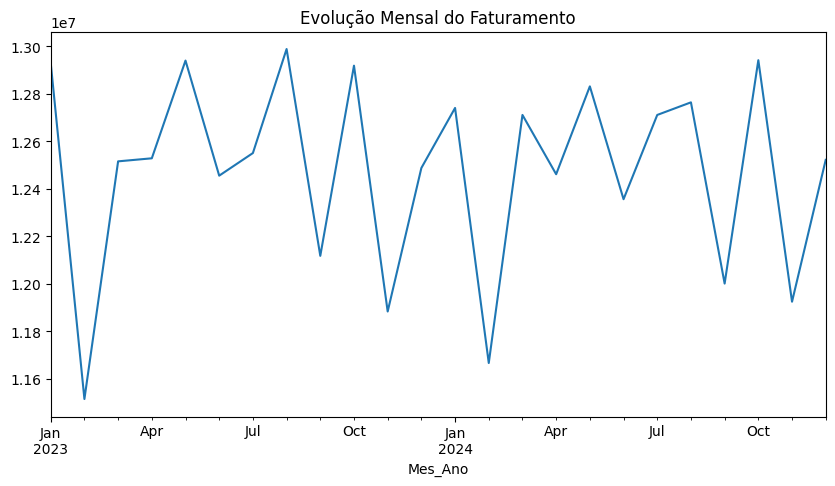

In [21]:
df_analise['Mes_Ano'] = df_analise['Data'].dt.to_period('M')

faturamento_mensal = (
    df_analise
    .groupby('Mes_Ano')['Faturamento']
    .sum()
)

faturamento_mensal.plot(
    title='Evolução Mensal do Faturamento',
    figsize=(10,5)
)


## Conclusão

Este projeto demonstrou como o Pandas pode ser utilizado para transformar dados brutos
em informações relevantes para tomada de decisão, passando por limpeza, enriquecimento
e análise de dados de vendas.
